In [1]:
# import library
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataset
df = pd.read_csv('https://query.data.world/s/tu7xkafdc4jbuzmuh5zxqaeshwj7sv', encoding = 'unicode_escape')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W


In [3]:
# drop kolom
df.drop(['City', 'Latitude', 'Longitude'], axis = 1, inplace = True)
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1849-01-01,26.704,1.435,CÃ´te D'Ivoire
1,1849-02-01,27.434,1.362,CÃ´te D'Ivoire
2,1849-03-01,28.101,1.612,CÃ´te D'Ivoire
3,1849-04-01,26.140,1.387,CÃ´te D'Ivoire
4,1849-05-01,25.427,1.200,CÃ´te D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [4]:
# ambil data 1945-2013
df['dt'] = pd.to_datetime(df['dt'])
get_data = (df['dt'] > '1945-01-01') & (df['dt'] <= '2013-09-01')
df.loc[get_data]

df = df.loc[get_data]
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1153,1945-02-01,27.933,0.394,CÃ´te D'Ivoire
1154,1945-03-01,28.512,0.354,CÃ´te D'Ivoire
1155,1945-04-01,27.967,0.438,CÃ´te D'Ivoire
1156,1945-05-01,27.193,0.301,CÃ´te D'Ivoire
1157,1945-06-01,25.786,0.237,CÃ´te D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [5]:
# ambil data negara India
df = df.loc[df['Country'].isin(['India'])]
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
5731,1945-02-01,21.127,0.315,India
5732,1945-03-01,26.643,0.352,India
5733,1945-04-01,29.685,0.696,India
5734,1945-05-01,32.437,0.388,India
5735,1945-06-01,32.142,0.606,India
...,...,...,...,...
216560,2013-05-01,32.980,1.097,India
216561,2013-06-01,29.418,0.527,India
216562,2013-07-01,27.306,0.257,India
216563,2013-08-01,27.187,0.129,India


In [6]:
# drop kolom
df.drop(['Country'], axis = 1, inplace = True)
df.reset_index(drop = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dt,AverageTemperature,AverageTemperatureUncertainty
0,1945-02-01,21.127,0.315
1,1945-03-01,26.643,0.352
2,1945-04-01,29.685,0.696
3,1945-05-01,32.437,0.388
4,1945-06-01,32.142,0.606
...,...,...,...
11531,2013-05-01,32.980,1.097
11532,2013-06-01,29.418,0.527
11533,2013-07-01,27.306,0.257
11534,2013-08-01,27.187,0.129


In [7]:
df.isnull().sum()

dt                                0
AverageTemperature               14
AverageTemperatureUncertainty    14
dtype: int64

In [8]:
df.dropna(subset = ['AverageTemperature'], inplace = True)
df.dropna(subset = ['AverageTemperatureUncertainty'], inplace = True)
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
dtype: int64

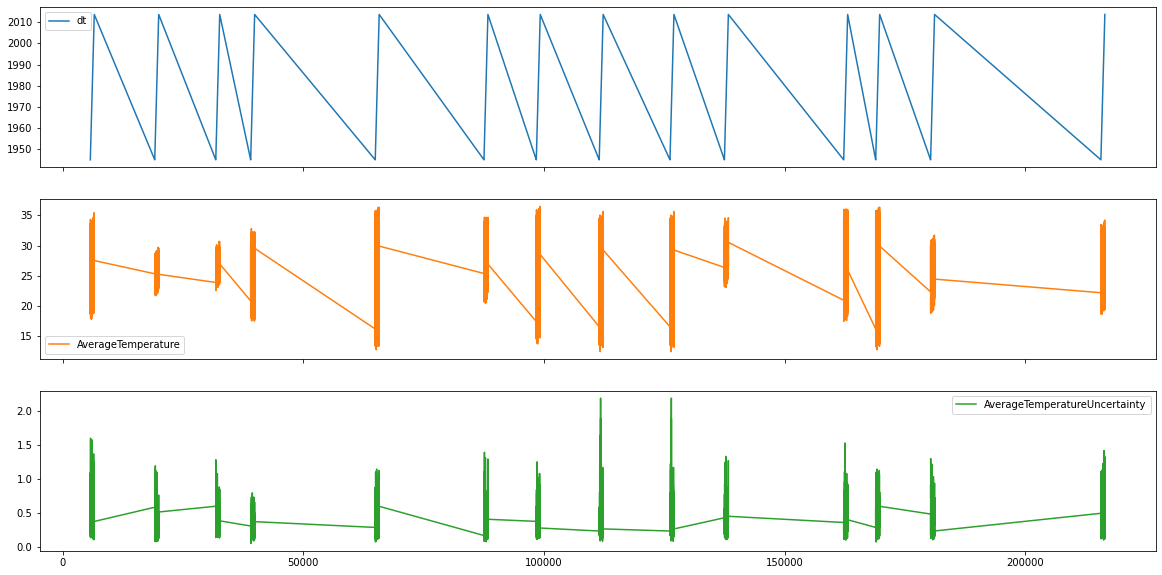

In [9]:
df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots = True, figsize = (20, 10))
plt.show()

Text(0.5, 0, 'Datetime')

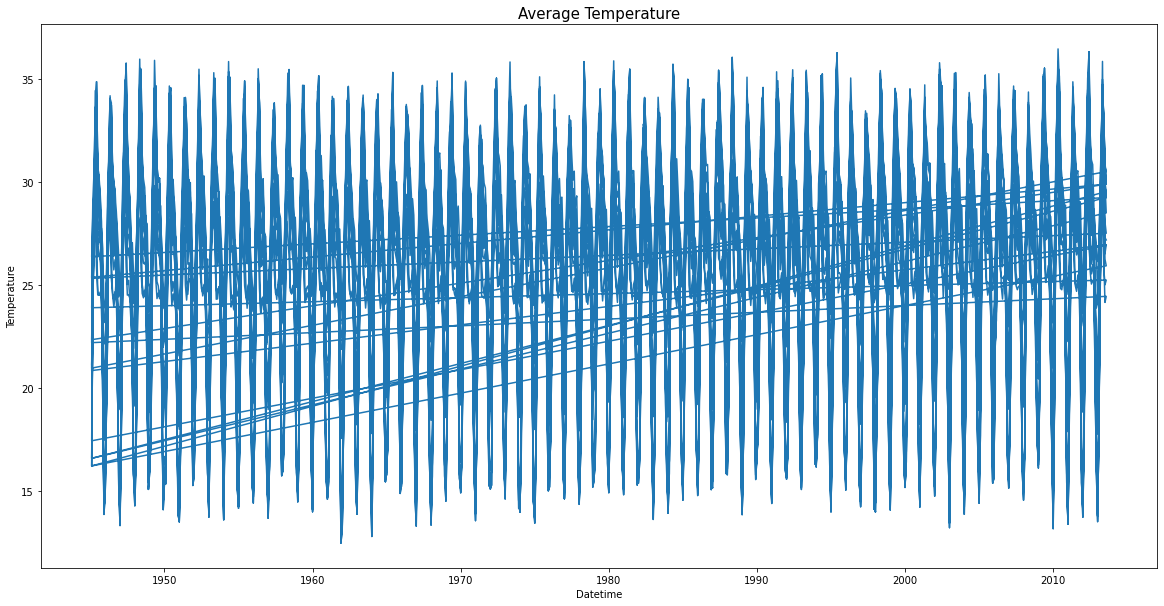

In [10]:
dates = df['dt'].values
temp = df['AverageTemperature'].values

dates = np.array(dates)
temp = np.array(temp)

plt.figure(figsize = (20, 10))
plt.plot(dates, temp)

plt.title('Average Temperature', fontsize = 15)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

In [11]:
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
dtype: object

In [12]:
# split dataset
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size = 0.8, test_size = 0.2, shuffle = False)

print('Jumlah Data Train : ', len(x_train))
print('Jumlah Data Validation : ', len(x_valid))

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis = -1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift = 1, drop_remainder = True)
  ds = ds.flat_map(lambda w : w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w : (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

Jumlah Data Train :  9217
Jumlah Data Validation :  2305


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size = 64, batch_size = 200, shuffle_buffer = 1000)
val_set = windowed_dataset(x_valid, window_size = 64, batch_size = 200, shuffle_buffer = 1000)

model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

In [14]:
Mae = (df['AverageTemperature'].max() - df['AverageTemperature'].min()) * 10/100
print(Mae)

2.403


In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 2.4 and logs.get('val_mae') < 2.4):
      print("Mae < 10% data")
      self.model.stop_training = True
callbacks = myCallback()

In [16]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=100, validation_data = val_set, callbacks=[callbacks])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


46/46 [==============================] - 67s 1s/step - loss: 24.5332 - mae: 25.0332 - val_loss: 22.9362 - val_mae: 23.4362
Epoch 2/100
46/46 [==============================] - 69s 1s/step - loss: 21.9404 - mae: 22.4404 - val_loss: 19.4748 - val_mae: 19.9748
Epoch 3/100
46/46 [==============================] - 57s 1s/step - loss: 16.2656 - mae: 16.7651 - val_loss: 10.1068 - val_mae: 10.6026
Epoch 4/100
46/46 [==============================] - 44s 947ms/step - loss: 5.3399 - mae: 5.8240 - val_loss: 3.5755 - val_mae: 4.0507
Epoch 5/100
46/46 [==============================] - 43s 931ms/step - loss: 3.3661 - mae: 3.8396 - val_loss: 3.2861 - val_mae: 3.7512
Epoch 6/100
46/46 [==============================] - 43s 932ms/step - loss: 3.3021 - mae: 3.7741 - val_loss: 3.3078 - val_mae: 3.7734
Epoch 7/100
46/46 [==============================] - 43s 927ms/step - loss: 3.2934 - mae: 3.7646 - val_loss: 3.3043 - val_mae: 3.7701
Epoch 8/100
46/46 [==============================] - 43s 927ms/step - l

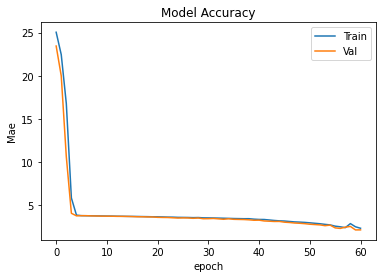

In [17]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Mae')
plt.legend(['Train', 'Val'], loc = 'best')
plt.show()

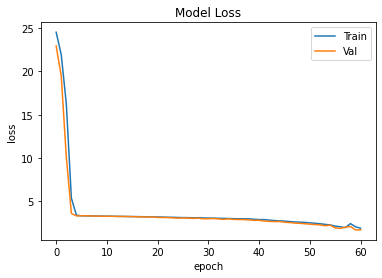

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc = 'best')
plt.show()